Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns


Importing Dataset

In [44]:
df = pd.read_csv('Tweets.csv', header=0)

Reading Dataset

In [4]:
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [5]:
np.sum(df.isnull())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [6]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

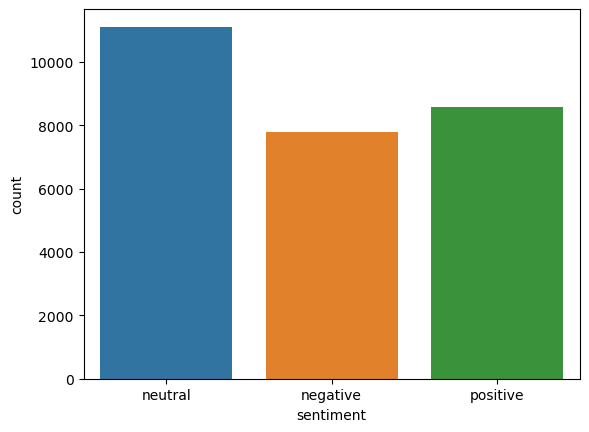

In [8]:
sns.countplot(x='sentiment', data=df)

Primary Analysis

Checking Null Values

In [9]:
df.isnull().values.any()

True

In [16]:
df.shape

(27480, 4)

Drop Nan Values

In [17]:
df=df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [19]:
df = df.reset_index(drop = True)
df.tail(10)

,textID,text,selected_text,sentiment
27470,15bb120f57,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,...",neutral
27471,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative
27472,a208770a32,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...,neutral
27473,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive
27474,b78ec00df5,enjoy ur night,enjoy,positive
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27479,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [45]:
X=df['selected_text']
y=df['sentiment']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

train_sentences,test_sentences,train_labels,test_labels=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
train_sentences,test_sentences,train_labels,test_labels=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(f'Total training samples :{train_sentences.shape}')
print("\n")
print(f'Total training labels {train_labels.shape}')
print("\n")
print(f'Total test samples:{test_sentences.shape}')
print("\n")
print(f'Total test labels {test_labels.shape}')

Total training samples :(21984,)


Total training labels (21984,)


Total test samples:(5496,)


Total test labels (5496,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# create a pipeline that includes both CountVectorizer and MultinomialNB
model = Pipeline([
    ('vect', CountVectorizer()),  # use CountVectorizer to convert text to numeric features
    ('clf', MultinomialNB())  # use Multinomial Naive Bayes classifier for classification
])
model.fit(train_sentences, train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [25]:
accuracy=model.score(test_sentences,test_labels)
print(f'model_accuracy:{accuracy}')

model_accuracy:0.7836608442503639


In [26]:
model_preds=model.predict(test_sentences)

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [28]:
calculate_results(y_true=test_labels,y_pred=model_preds)

{'accuracy': 78.36608442503639,
 'precision': 0.8107522110640693,
 'recall': 0.7836608442503639,
 'f1': 0.7809473132814091}

In [38]:
#checking out number of negative, neutral and positive sentiment labels in the dataset.
print("Number of positive sentiment in train data of length: {0} is {1}".format(len(df), len(df[df['sentiment']=="positive"])))
print("Number of negative sentiment in train data of length: {0} is {1}".format(len(df), len(df[df['sentiment']=="neutral"])))
print("Number of neutral sentiment in train data of length: {0} is {1}".format(len(df), len(df[df['sentiment']=="negative"])))

Number of positive sentiment in train data of length: 27480 is 8582
Number of negative sentiment in train data of length: 27480 is 11117
Number of neutral sentiment in train data of length: 27480 is 7781


Plotting the same.


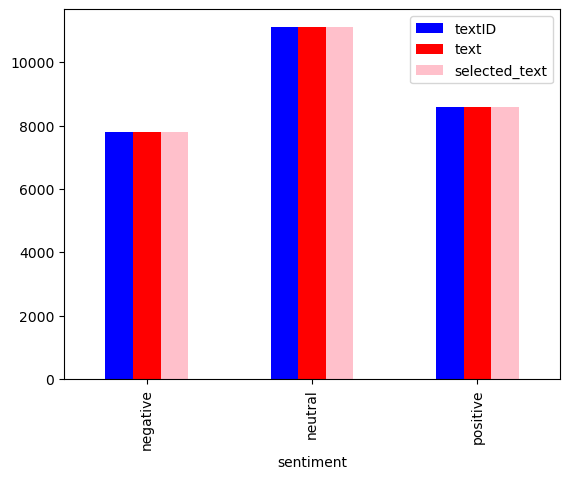

In [46]:
# Define the colors for each sentiment
colors = ['blue', 'red', 'pink']  # Add more colors if needed

# Group by sentiment and count, then plot the bar graph with different colors
df.groupby('sentiment').count().plot.bar(color=colors)

# Display the plot
plt.show()

Conclusion:
1. Unique ID = There are 27,481 Unique IDs
2. Unique Text = There are 27,481 Unique Texts
3. Selected Text = There are 27,481 Selected Texts
2. Sentiments of the Tweet = There are 40% of Neutral Tweets. 31 % of Positive Tweets and 28% of Negative Tweets. 
